In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from Functions.timeline import *

In [38]:
# Reference: https://www.statista.com/statistics/306648/inflation-rate-consumer-price-index-cpi-united-kingdom-uk/
inflation = pd.read_csv('../Data/inflation.csv')
inflation['Date'] = pd.to_datetime(inflation['Date'], format='%b %y').dt.date
inflation['Inflation'] = inflation['Inflation']/100
inflation.head(5)

,Date,Inflation
0,1989-01-01,0.049
1,1989-02-01,0.050
2,1989-03-01,0.050
3,1989-04-01,0.053
4,1989-05-01,0.053


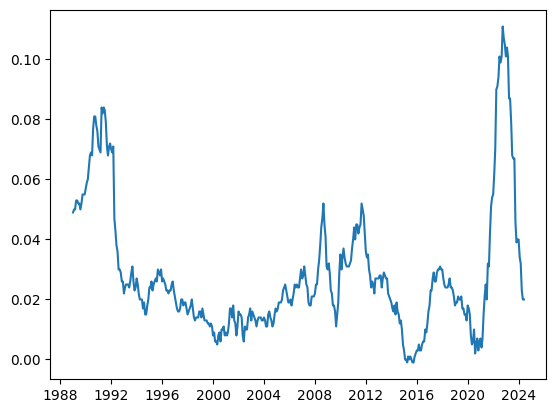

In [45]:
plt.plot(inflation['Date'], inflation['Inflation'])
plt.show()

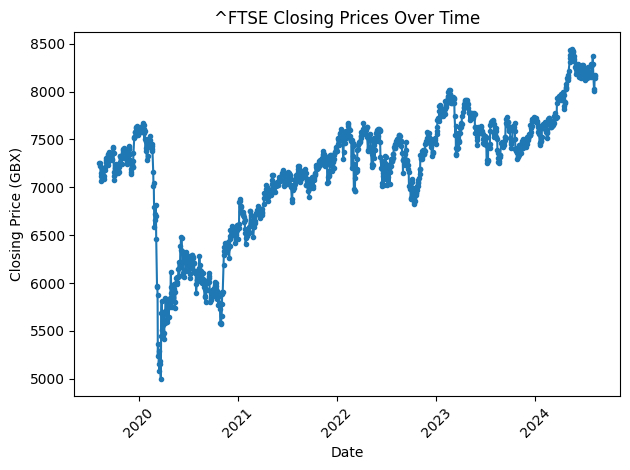

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-09,7285.899902,7297.299805,7237.100098,7253.899902,794807200,0.0,0.0
1,2019-08-12,7253.899902,7305.600098,7207.500000,7226.700195,585461200,0.0,0.0
2,2019-08-13,7226.700195,7281.100098,7166.899902,7250.899902,698409600,0.0,0.0
3,2019-08-14,7250.899902,7268.700195,7112.100098,7147.899902,811517700,0.0,0.0
4,2019-08-15,7147.899902,7148.799805,7020.200195,7067.000000,877816600,0.0,0.0


In [37]:
# Reference: https://pypi.org/project/yfinance/
ftse = Get5YSecurityPlot(security='^FTSE')
ftse.head(5)

In [40]:
ftse_filtered = ftse[ftse['Date'].isin(inflation['Date'])]
ftse_inflation = pd.merge(ftse, inflation, on='Date', how='inner')
ftse_inflation['Corrected Close'] = ftse_inflation['Close']/(1 + ftse_inflation['Inflation'])
ftse_inflation.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Inflation,Corrected Close
0,2019-10-01,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0,0.015,7251.526901
1,2019-11-01,7248.399902,7307.200195,7248.399902,7302.399902,582078600,0.0,0.0,0.015,7194.482662
2,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,1670362100,0.0,0.0,0.008,5411.309621
3,2020-05-01,5901.200195,5901.200195,5746.100098,5763.100098,781328900,0.0,0.0,0.005,5734.427958
4,2020-06-01,6076.600098,6179.299805,6076.600098,6166.399902,742112200,0.0,0.0,0.006,6129.622169


/var/folders/xp/76xh1qw13vj4j6_hrsz7t82r0000gp/T/ipykernel_14261/1315625751.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


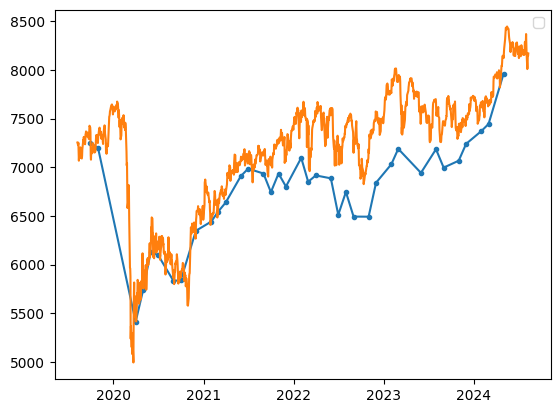

In [43]:
plt.plot(ftse_inflation['Date'], ftse_inflation['Corrected Close'], marker='.')
plt.plot(ftse['Date'], ftse['Close'])
plt.legend()
plt.show()

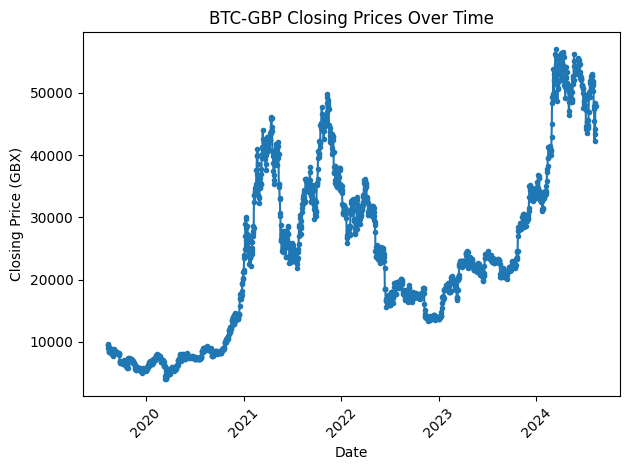

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-10,9853.395508,9898.334961,9406.762695,9431.788086,15056732770,0.0,0.0
1,2019-08-11,9428.228516,9585.428711,9343.958984,9585.428711,13121279972,0.0,0.0
2,2019-08-12,9582.231445,9582.231445,9370.578125,9424.601562,11299634484,0.0,0.0
3,2019-08-13,9426.390625,9459.284180,8973.510742,9032.261719,13828382580,0.0,0.0
4,2019-08-14,9026.732422,9027.061523,8315.168945,8334.742188,16576143237,0.0,0.0
...,...,...,...,...,...,...,...,...
1823,2024-08-06,45442.195312,45575.136719,38611.304688,42219.269531,85226887266,0.0,0.0
1824,2024-08-07,42219.183594,44932.687500,42205.046875,44175.886719,38867121256,0.0,0.0
1825,2024-08-08,44180.863281,45407.445312,43050.246094,43387.445312,32829927018,0.0,0.0
1826,2024-08-09,43389.472656,49182.296875,43157.714844,48416.046875,35539913219,0.0,0.0


In [39]:
# Reference: https://pypi.org/project/yfinance/
btc = Get5YSecurityPlot(security='BTC-GBP')
btc

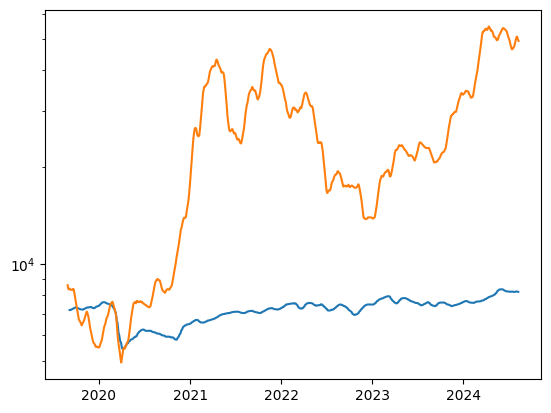

In [40]:
plt.figure()
plt.plot(ftse['Date'], ftse['Close'].rolling(window=20).mean())
plt.plot(btc['Date'], btc['Close'].rolling(window=20).mean())
plt.yscale('log')
plt.show()

In [54]:
# Filter the BTC DataFrame to include only the common dates
common_dates = btc['Date'].isin(ftse['Date'])
btc_filtered = btc.loc[common_dates]
btc_filtered

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2,2019-08-12,9582.231445,9582.231445,9370.578125,9424.601562,11299634484,0.0,0.0
3,2019-08-13,9426.390625,9459.284180,8973.510742,9032.261719,13828382580,0.0,0.0
4,2019-08-14,9026.732422,9027.061523,8315.168945,8334.742188,16576143237,0.0,0.0
5,2019-08-15,8324.040039,8626.843750,7978.304688,8528.679688,18939858084,0.0,0.0
6,2019-08-16,8536.224609,8691.881836,8105.224609,8538.547852,16648724710,0.0,0.0
...,...,...,...,...,...,...,...,...
1822,2024-08-05,47380.992188,47683.113281,44673.226562,45447.417969,24835441506,0.0,0.0
1823,2024-08-06,45442.195312,45575.136719,38611.304688,42219.269531,85226887266,0.0,0.0
1824,2024-08-07,42219.183594,44932.687500,42205.046875,44175.886719,38867121256,0.0,0.0
1825,2024-08-08,44180.863281,45407.445312,43050.246094,43387.445312,32829927018,0.0,0.0


In [62]:
# Manually remove mismatch ftse data being available from an earlier day
ftse_filtered = ftse.iloc[1:]
ftse_filtered

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1,2019-08-12,7253.899902,7305.600098,7207.500000,7226.700195,585461200,0.0,0.0
2,2019-08-13,7226.700195,7281.100098,7166.899902,7250.899902,698409600,0.0,0.0
3,2019-08-14,7250.899902,7268.700195,7112.100098,7147.899902,811517700,0.0,0.0
4,2019-08-15,7147.899902,7148.799805,7020.200195,7067.000000,877816600,0.0,0.0
5,2019-08-16,7067.000000,7125.899902,7067.000000,7117.200195,651943200,0.0,0.0
...,...,...,...,...,...,...,...,...
1257,2024-08-05,8174.700195,8174.700195,7915.899902,8008.200195,1648338500,0.0,0.0
1258,2024-08-06,8008.200195,8058.299805,7949.899902,8026.700195,1282405500,0.0,0.0
1259,2024-08-07,8026.700195,8177.000000,8026.700195,8166.899902,816442600,0.0,0.0
1260,2024-08-08,8166.899902,8166.899902,8064.299805,8145.000000,755462800,0.0,0.0


In [64]:
import numpy as np

r = np.corrcoef(ftse_filtered['Close'], btc_filtered['Close'])
r

array([[1.       , 0.5378206],
       [0.5378206, 1.       ]])

In [65]:
import scipy.stats as stats

# Test statistic
t_stat = 3.345
df = len(btc_filtered)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print("p-value:", p_value)


p-value: 0.0008470192179552694
